In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
cardata= pd.read_csv('/content/drive/MyDrive/car data.csv')

In [ ]:
cardata.shape

(301, 9)






# New Section

In [ ]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
cardata.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
print(cardata.Seller_Type.value_counts())
cardata.Transmission.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


Manual       261
Automatic     40
Name: Transmission, dtype: int64

encode categorical values

In [ ]:
cardata.replace({'Fuel_Type':{'Petrol':1,'Diesel':0,'CNG':2}},inplace=True)
cardata.replace({'Seller_Type':{'Individual':1,'Dealer':0}},inplace=True)
cardata.replace({'Transmission':{'Manual':1,'Automatic':0}},inplace=True)

In [ ]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,0,1,0
1,sx4,2013,4.75,9.54,43000,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,1,0,1,0
3,wagon r,2011,2.85,4.15,5200,1,0,1,0
4,swift,2014,4.60,6.87,42450,0,0,1,0


In [ ]:
X = cardata.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y = cardata['Selling_Price']

In [ ]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,1,0,1,0
1,2013,9.54,43000,0,0,1,0
2,2017,9.85,6900,1,0,1,0
3,2011,4.15,5200,1,0,1,0
4,2014,6.87,42450,0,0,1,0


Train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model1 linear regression

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
train_predict = model1.predict(X_train)
rsquare = metrics.r2_score(train_predict,Y_train)
print(rsquare)

0.8668069065298183


In [ ]:
test_predict = model1.predict(X_test)
rsquare = metrics.r2_score(test_predict,Y_test)
print(rsquare)

0.8432084382219766


In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Predicted Price')

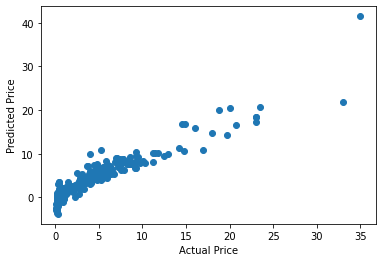

In [ ]:
plt.scatter(Y_train,train_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

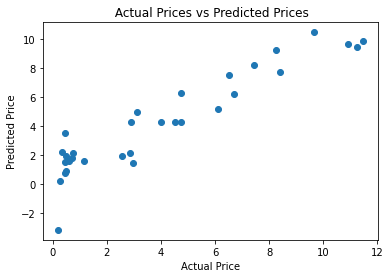

In [ ]:
plt.scatter(Y_test, test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Model 2- Lasso

In [ ]:
model2 = Lasso()
model2.fit(X_train,Y_train)

Lasso()

In [ ]:
train2_predict = model2.predict(X_train)
r2square = metrics.r2_score(train2_predict,Y_train)
print(r2square)

0.798459024070425


In [ ]:
test2_predict = model2.predict(X_test)
r3square = metrics.r2_score(test2_predict,Y_test)
print(r3square)

0.7711110403265475


Text(0, 0.5, 'Predicted Price')

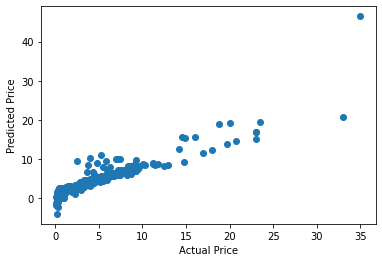

In [ ]:
plt.scatter(Y_train,train2_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

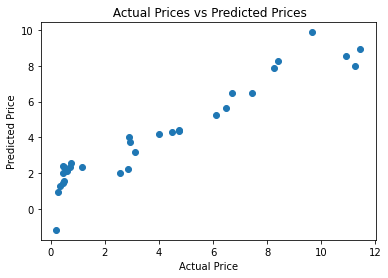

In [ ]:
plt.scatter(Y_test, test2_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Predictive system

In [ ]:
userInput = [2014,5.59,27000,1,0,1,0]

In [ ]:
input_numpy_as_array = np.asarray(userInput)

#reshape 
input_reshape = input_numpy_as_array.reshape(1,-1)

#model predict
input_data_predict = model1.predict(input_reshape)
print("Predicted car Price" ,input_data_predict)

Predicted car Price [3.84402773]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
